In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [21]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    N = len(y)
    weights = np.linalg.solve(tx.T @ tx, tx.T @ y)
#     weights = inv(tx.T @ tx) @ tx.T @ y
    e = y - tx@weights
    mse = 1/(2*N) * (e.T @ e)
    return mse, weights

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [22]:
from my_helpers import compute_loss, grid_search, generate_w, get_best_parameters, grid_visualization
import datetime

In [23]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    # Least squares
    loss_least_squares, weights_least_squares = least_squares(y, tx)
    print("Least squares results:")
    print("loss =", loss_least_squares)
    print("weights =", weights_least_squares)
    
    # Grid search
    grid_w0, grid_w1 = generate_w(num_intervals=200)      # Generate the grid of parameters to be swept
    start_time = datetime.datetime.now()                  # Start the grid search
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)    # Grid search
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)  # Select the best combinaison
    print("Grid search results:")
    print("loss =", loss_star)
    print("weights =", np.array([w0_star, w1_star]))

Test it here

In [24]:
test_your_least_squares()

Least squares results:
loss = 15.385887868829398
weights = [73.293922   13.47971243]
Grid search results:
loss = 15.610085652488802
weights = [73.36683417 12.81407035]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [25]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [57]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    matrix = np.ones([x.shape[0], degree+1])
    for i in range(degree+1):
        matrix[:, i] = x**i
    
#     # Senza pre-inizializzazione matrice
#     matrix = np.ones([x.shape[0], 1])
#     for i in range(1, degree+1):
#         new_column = np.reshape(x**i, [x.shape[0], 1])
#         matrix = np.concatenate([matrix, new_column], axis=1)

    return matrix


# %timeit build_poly(x, 2)

7.87 µs ± 80.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [53]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        matrix = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, weights = least_squares(y, matrix)
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248677


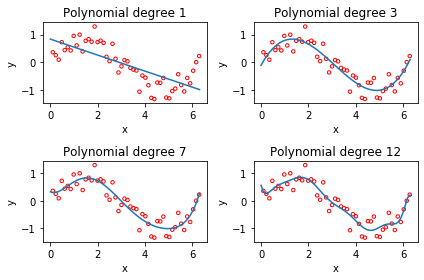

In [54]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [29]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    N = len(y)
    shuffle_indices = np.random.permutation(np.arange(N))
    shuffled_x = x[shuffle_indices]
    shuffled_y = y[shuffle_indices]
    training_instances_number = int(np.floor(N*ratio))
    tx_train = shuffled_x[0:training_instances_number]
    y_train = shuffled_y[0:training_instances_number]
    tx_test = shuffled_x[training_instances_number+1:-1]
    y_test = shuffled_y[training_instances_number+1:-1]
    return tx_train, y_train, tx_test, y_test
    

Then, test your `split_data` function below.

In [30]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    tx_train, y_train, tx_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_train_poly = build_poly(tx_train, degree)
    tx_test_poly = build_poly(tx_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    loss, weights = least_squares(y_train, tx_train_poly)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*loss)
    e_test = y_test - tx_test_poly@weights
    mse_te = 1/(2*len(y_test)) * np.sum(e_test.T @ e_test)
    rmse_te = np.sqrt(2*mse_te)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [36]:
seed = 56
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.566
proportion=0.9, degree=3, Training RMSE=0.252, Testing RMSE=0.315
proportion=0.9, degree=7, Training RMSE=0.235, Testing RMSE=0.377
proportion=0.9, degree=12, Training RMSE=0.224, Testing RMSE=0.546
proportion=0.5, degree=1, Training RMSE=0.451, Testing RMSE=0.511
proportion=0.5, degree=3, Training RMSE=0.240, Testing RMSE=0.323
proportion=0.5, degree=7, Training RMSE=0.227, Testing RMSE=0.351
proportion=0.5, degree=12, Training RMSE=0.222, Testing RMSE=2.751
proportion=0.1, degree=1, Training RMSE=0.221, Testing RMSE=0.860
proportion=0.1, degree=3, Training RMSE=0.120, Testing RMSE=0.444
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=5.768
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=3.048


# 3 Ridge Regression
Please fill in the function below.

In [17]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    N = len(y)
    lambda_prime = lambda_*(2*N)
    weights = inv(tx.T @ tx + lambda_prime*np.eye(tx.shape[1])) @ tx.T @ y
    e = y - tx@weights
    mse = 1/(2*N) * (e.T @ e)
    return mse, weights

In [18]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
#     lambdas = [0]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    tx_train, y_train, tx_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_train_poly = build_poly(tx_train, degree)
    tx_test_poly = build_poly(tx_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        mse, weights = ridge_regression(y_train, tx_train_poly, lambda_)
        print(ind)
        rmse_tr.append(np.sqrt(2*mse))
        e_test = y_test - tx_test_poly@weights
        mse_te = 1/(2*len(y_test)) * np.sum(e_test.T @ e_test)
        rmse_te.append(np.sqrt(2*mse_te))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


0
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.350
1
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.350
2
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.349
3
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.348
4
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.348
5
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.347
6
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.343
7
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.332
8
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.313
9
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.291
10
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.277
11
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.290
12
proportion=

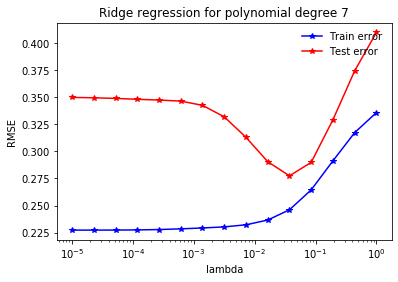

In [19]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)